# Imports

In [ ]:
from lib.LC_FS import LC_FS

import pennylane as qml
#from pennylane import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.svm import SVC

## Import data

In [2]:
# Load the dataset
data = load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Subset 6-10 features (for example, we'll pick the first 6 features)
n=6
subset_features = df.iloc[:, :n]

X_raw = subset_features.to_numpy()
Y_raw = data.target

X_train, X_test, y_train, y_test = train_test_split(X_raw, Y_raw, test_size=0.96, random_state=92)
print(len(y_train), y_train)
print(sum(y_train)/len(y_train))

22 [0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0]
0.5909090909090909


In [ ]:
m_test = 15
X_test = X_test[:m_test]
y_test = y_test[:m_test]
print(y_test)
print(sum(y_test)/len(y_test))

[1 1 1 0 0 0 1 1 1 1 1 0 1 1 0]
0.6666666666666666


# Embedding circuit

In [4]:
L=n//2

dev = qml.device('default.qubit', wires=n)
wires = list(range(n))

In [5]:
lc = LC_FS(L=L, n=n)

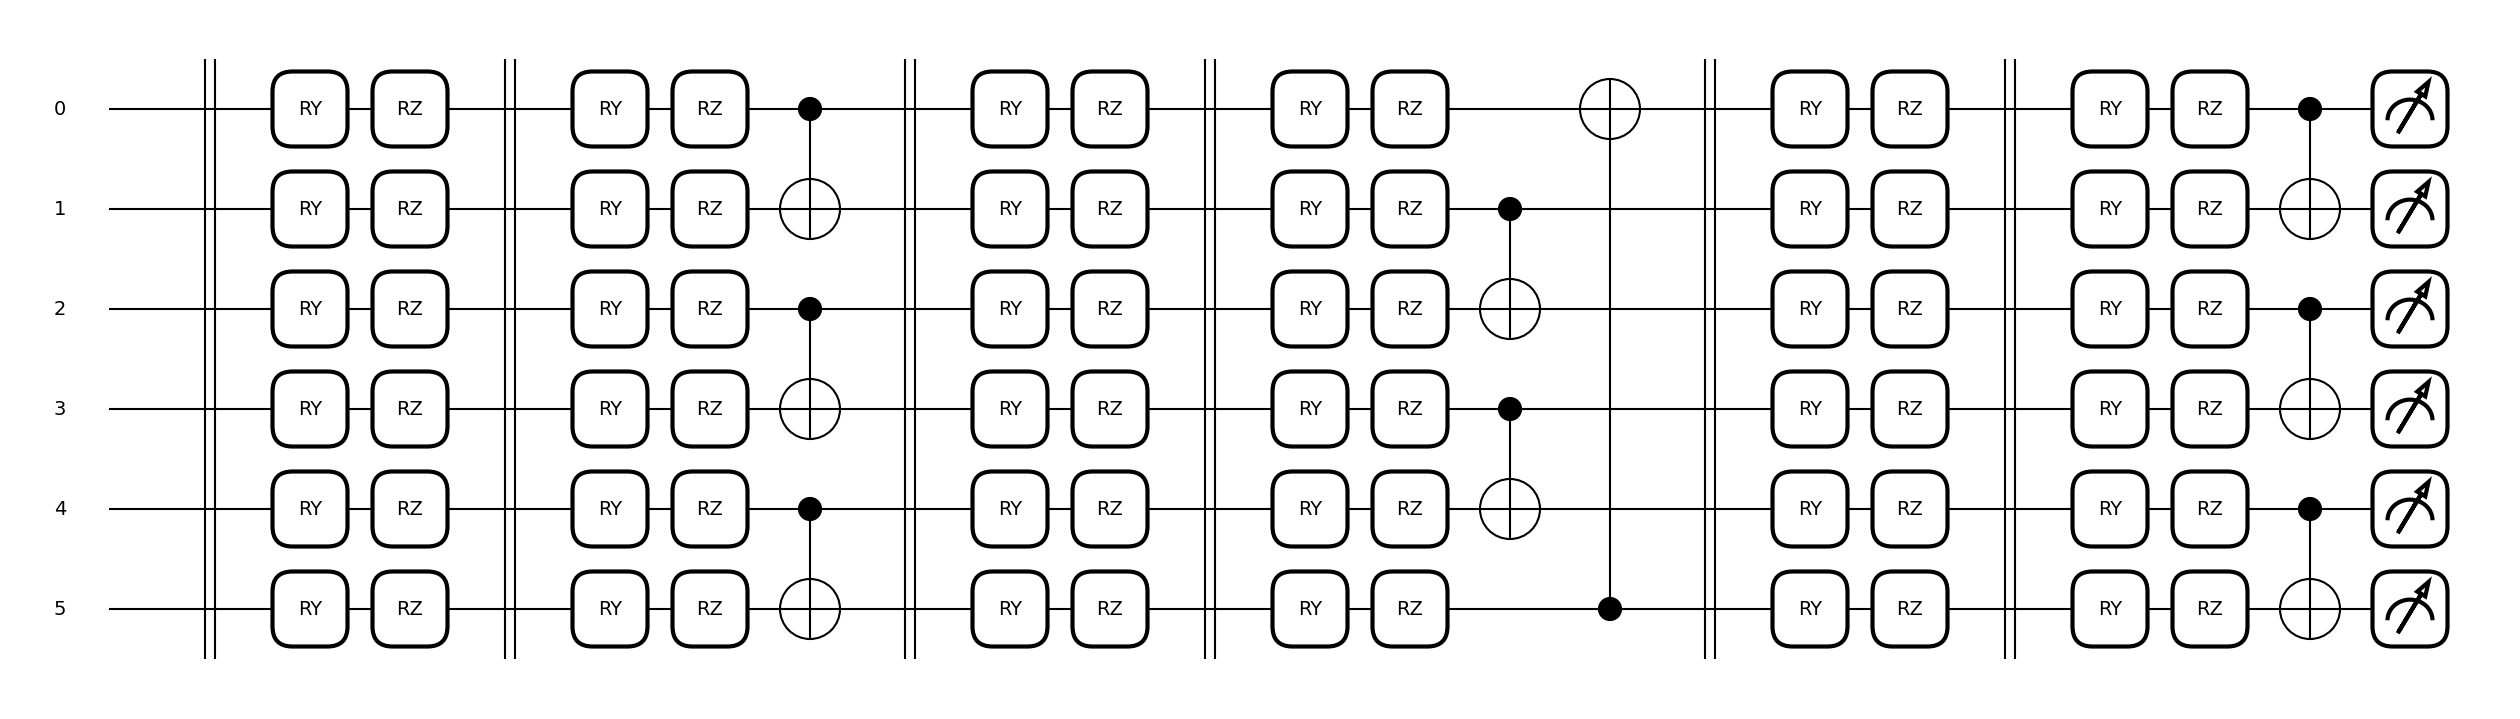

In [6]:
lc.draw(lc.Lambda, lc.thetas)

In [7]:
history = lc.optimize_parameters(X_train, y_train, max_iterations=300, stepsize=1)

-------------------
Lambdas optimization
     pcost       dcost       gap    pres   dres
 0: -6.8564e-01 -1.1485e+00  8e+00  3e+00  5e-01
 1: -5.9015e-01 -1.0984e+00  7e-01  8e-02  1e-02
 2: -6.3554e-01 -7.0201e-01  7e-02  7e-17  1e-16
 3: -6.4740e-01 -6.5261e-01  5e-03  3e-17  1e-16
 4: -6.4894e-01 -6.4915e-01  2e-04  3e-17  1e-16
 5: -6.4896e-01 -6.4896e-01  2e-06  3e-17  1e-16
 6: -6.4896e-01 -6.4896e-01  2e-08  6e-17  1e-16
Optimal solution found.
-------------------
Thetas optimization
Step = 0,  Cost function = -0.20140407 
Step = 10,  Cost function = -0.23197066 
Step = 20,  Cost function = -0.27893993 
Step = 30,  Cost function = -0.32737134 
Step = 40,  Cost function = -0.35812946 
Step = 50,  Cost function = -0.37286558 
Step = 60,  Cost function = -0.38117959 
Step = 70,  Cost function = -0.38664574 
Step = 80,  Cost function = -0.39072182 
Step = 90,  Cost function = -0.39383027 
Step = 100,  Cost function = -0.39611016 
Step = 110,  Cost function = -0.39773401 
Step = 120,

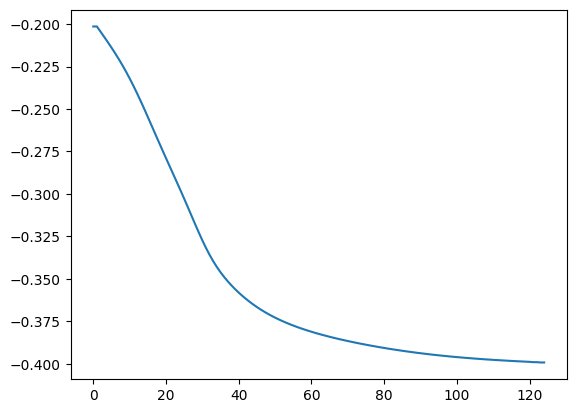

In [ ]:
flattened_history = [item for sublist in history for item in sublist]
plt.plot(flattened_history)
plt.title('-Centered alignment')
plt.xlabel('optimization step')
plt.show()

In [9]:
K_train = lc.get_train_kernel_matrix(X_train)

In [10]:
clf = SVC(kernel='precomputed')
clf.fit(K_train, y_train)
clf.score(K_train, y_train)

1.0

In [11]:
K_test = lc.get_test_kernel_matrix(X_train, X_test)
clf.score(K_test, y_test)

0.5333333333333333

In [12]:
sorted_wires, sorted_PS = lc.LC_feature_selection(X_train, y_train, max_iterations=300, optimize=False)

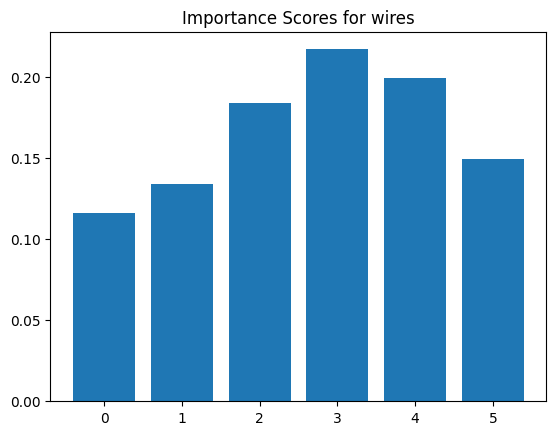

In [13]:
plt.bar(sorted_wires, sorted_PS)
plt.title('Importance Scores for wires')
plt.show()

In [14]:
n_new = 4
selected_features = sorted_wires[:n_new]
X_train_FS = X_train[:,selected_features]
X_test_FS = X_test[:,selected_features]

In [15]:
L_new = n_new//2
FS_lc = LC_FS(n=n_new, L=L_new)

In [ ]:
FS_lc.optimize_parameters(X_train, y_train, max_iterations=300)

-------------------
Lambdas optimization
     pcost       dcost       gap    pres   dres
 0: -4.1350e-01 -7.8117e-01  4e-01  0e+00  5e-01
 1: -4.1461e-01 -4.2687e-01  1e-02  3e-17  2e-02
 2: -4.1518e-01 -4.1560e-01  4e-04  3e-17  2e-04
 3: -4.1519e-01 -4.1519e-01  5e-06  2e-17  2e-06
 4: -4.1519e-01 -4.1519e-01  5e-08  6e-17  2e-08
Optimal solution found.
-------------------
Thetas optimization
Step = 0,  Cost function = -0.17301477 
Step = 10,  Cost function = -0.18463020 
Step = 20,  Cost function = -0.19896705 
Step = 30,  Cost function = -0.21669784 
Step = 40,  Cost function = -0.23894990 


In [87]:
K_train = FS_lc.get_train_kernel_matrix(X_train_FS)

In [88]:
clf = SVC(C=1, kernel='precomputed')
clf.fit(K_train, y_train)
clf.score(K_train, y_train)

0.5909090909090909

In [89]:
K_test = FS_lc.get_test_kernel_matrix(X_train_FS, X_test_FS)
clf.score(K_test, y_test)

0.7